In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# PSO algorithm for optimizing the learning rate of the CNN model
class ParticleSwarmOptimization:
    def __init__(self, initial_learning_rate, c1, c2, w):
        self.learning_rate = initial_learning_rate
        self.c1 = c1
        self.c2 = c2
        self.w = w
        self.velocity = 0

    def update_learning_rate(self, global_best_learning_rate):
        r1 = np.random.random()
        r2 = np.random.random()
        new_velocity = self.w * self.velocity + self.c1 * r1 * (global_best_learning_rate - self.learning_rate) + self.c2 * r2 * (self.learning_rate - global_best_learning_rate)
        self.learning_rate += new_velocity
        self.velocity = new_velocity

# Data Preparation
train_datagen = ImageDataGenerator(rescale=1./255)
training_set = train_datagen.flow_from_directory(
    '/content/drive/MyDrive/plant/plant/Train/Train',
    target_size=(64, 64),
    batch_size=8,
    class_mode='categorical'
)

# Model Architecture
model = Sequential()
model.add(Conv2D(32, (3, 3), input_shape=(64, 64, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(32, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(32, (3, 3), input_shape=(64, 64, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(units=128, activation='relu'))
model.add(Dense(units=3, activation='softmax'))
model.summary()

# PSO hyperparameters
initial_learning_rate = 0.001
c1 = 0.1
c2 = 0.1
w = 0.5

pso = ParticleSwarmOptimization(initial_learning_rate, c1, c2, w)

# Model Compilation with PSO-optimized learning rate
learning_rate = pso.learning_rate
optimizer = tf.keras.optimizers.Adam(learning_rate=learning_rate)
model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

# Model Training
history = model.fit(training_set, steps_per_epoch=20, epochs=30)

# Prediction
test_datagen = ImageDataGenerator(rescale=1./255)
test_set = test_datagen.flow_from_directory(
    '/content/drive/MyDrive/plant/plant/Test/Test',
    target_size=(64, 64),
    batch_size=8,
    class_mode='categorical'
)

# Evaluate the model
steps = len(test_set)
loss, accuracy = model.evaluate(test_set, steps=steps)
print(f"Test accuracy: {accuracy}")

# Make predictions
predictions = model.predict(test_set)


Found 1322 images belonging to 3 classes.
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 62, 62, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 31, 31, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 29, 29, 32)        9248      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 14, 14, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 12, 12, 32)        9248      
                                                                 
 max_pooling2d

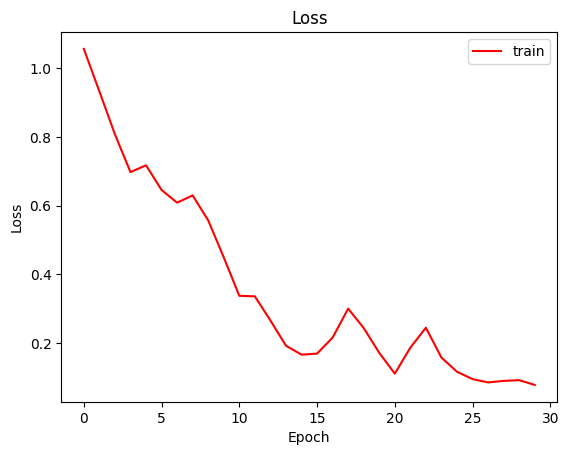

In [ ]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'],c='red')
plt.title('Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['train','validation'],loc='upper right')

In [ ]:
print("Testing Data")
import os,pathlib
test='/content/drive/MyDrive/plant/plant/Test/Test'
def no_of_files(rootdir):
    for path in pathlib.Path(rootdir).iterdir():
        if path.is_dir():
            print("There are " + str(len([name for name in os.listdir(path) \
            if os.path.isfile(os.path.join(path, name))])) + " files in " + \
            str(path.name))

no_of_files(os.path.join(test))

Testing Data
There are 50 files in Powdery
There are 50 files in Rust
There are 50 files in Healthy


In [ ]:
print("Training Data")
import os,pathlib
train='/content/drive/MyDrive/plant/plant/Train/Train'
def no_of_files(rootdir):
    for path in pathlib.Path(rootdir).iterdir():
        if path.is_dir():
            print("There are " + str(len([name for name in os.listdir(path) \
            if os.path.isfile(os.path.join(path, name))])) + " files in " + \
            str(path.name))

no_of_files(os.path.join(train))

Training Data
There are 430 files in Powdery
There are 434 files in Rust
There are 458 files in Healthy


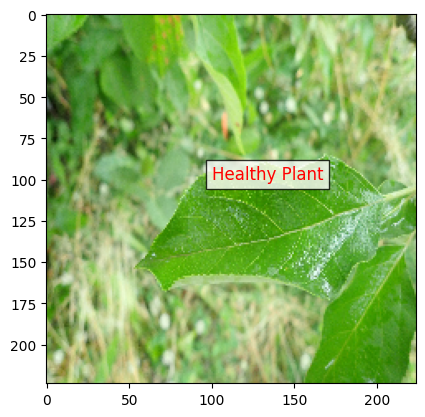

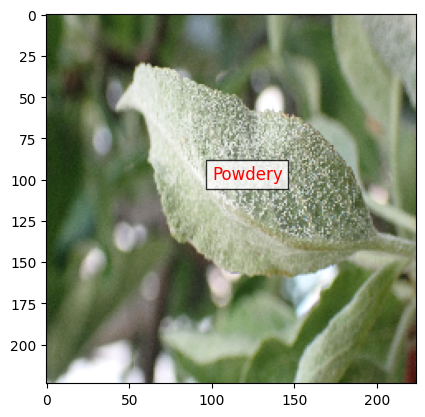

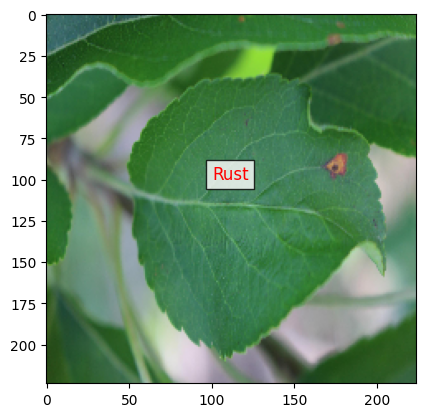

In [ ]:
pic = image.load_img('/content/drive/MyDrive/plant/plant/Train/Train/Healthy/800edef467d27c15.jpg', target_size=(224, 224))
plt.imshow(pic)
plt.text(100, 100, 'Healthy Plant', color='red', fontsize=12, bbox=dict(facecolor='white', alpha=0.8))
plt.show()
pic = image.load_img('/content/drive/MyDrive/plant/plant/Train/Train/Powdery/802f7439ec1ef0cd.jpg', target_size=(224, 224))
plt.imshow(pic)
plt.text(100, 100, 'Powdery', color='red', fontsize=12, bbox=dict(facecolor='white', alpha=0.8))
plt.show()
pic = image.load_img('/content/drive/MyDrive/plant/plant/Train/Train/Rust/807947b90eb77856.jpg', target_size=(224, 224))
plt.imshow(pic)
plt.text(100, 100, 'Rust', color='red', fontsize=12, bbox=dict(facecolor='white', alpha=0.8))
plt.show()

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Data Preparation
train_datagen = ImageDataGenerator(rescale=1./255)
training_set = train_datagen.flow_from_directory(
    '/content/drive/MyDrive/plant/plant/Train/Train',
    target_size=(64, 64),
    batch_size=32,
    class_mode='categorical'
)

input_shape=(64,64,3)

model= Sequential()
model.add(Conv2D(filters=32, kernel_size=(3,3), strides=(1,1),padding='valid',activation='relu',input_shape=input_shape))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(filters=32, kernel_size=(3,3),strides=(1,1),padding='valid',activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(filters=64, kernel_size=(3,3),strides=(1,1),padding='valid',activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(filters=64, kernel_size=(3,3),strides=(1,1),padding='valid',activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Flatten())
model.add(Dense(units=128,activation='relu'))
model.add(Dense(units=128,activation='relu'))
model.add(Dense(units=100,activation='relu'))
model.add(Dense(units=3,activation='softmax'))
model.summary()

# Model Compilation with a specified learning rate
learning_rate = 0.001
optimizer = tf.keras.optimizers.Adam(learning_rate=learning_rate)
model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

# Model Training
history = model.fit(training_set, steps_per_epoch=20, epochs=30)

# Prediction
# Assuming you have a test dataset for prediction purposes
test_datagen = ImageDataGenerator(rescale=1./255)
test_set = test_datagen.flow_from_directory(
    '/content/drive/MyDrive/plant/plant/Test/Test',
    target_size=(64,64),
    batch_size=8,
    class_mode='categorical'
)

# Evaluate the model
steps = len(test_set)
loss, accuracy = model.evaluate(test_set, steps=steps)
print(f"Test accuracy: {accuracy}")

# Make predictions
predictions = model.predict(test_set)


Found 1322 images belonging to 3 classes.
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 62, 62, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 31, 31, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 29, 29, 32)        9248      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 14, 14, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 12, 12, 64)        18496     
                                                                 
 max_pooling2d

1/1 [==============================] - 0s 25ms/step
[[0.9492932  0.04320044 0.00750635]]
Healthy


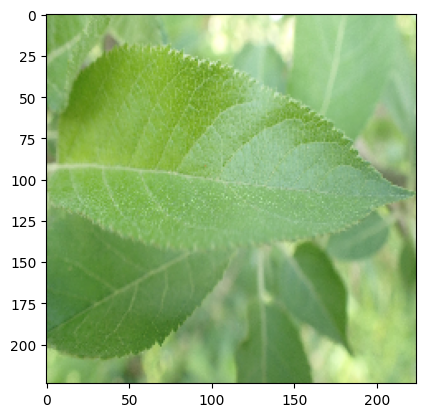

In [ ]:
import numpy as np
from keras.preprocessing import image
import matplotlib.pyplot as plt
test_img='/content/drive/MyDrive/plant/plant/Test/Test/Healthy/8ddaac1bd6c8cd0a.jpg'
# Load the test image
test_image = image.load_img(test_img, target_size=(64, 64))

# Preprocess the image
test_image = image.img_to_array(test_image)
test_image=test_image/255
test_image = np.expand_dims(test_image, axis=0)

# Make prediction
result = model.predict(test_image)
print(result)
res = result[0]
val = max(res)
ind = np.where(res == val)[0]
class_names = ['Healthy', 'Powdery', 'Rust']  # Replace with your class names
predicted_class_name = class_names[int(ind)]
print(predicted_class_name)

# Load the image again for displaying
pic = image.load_img(test_img, target_size=(224, 224))
plt.imshow(pic)
plt.show()


19/19 [==============================] - 13s 667ms/step


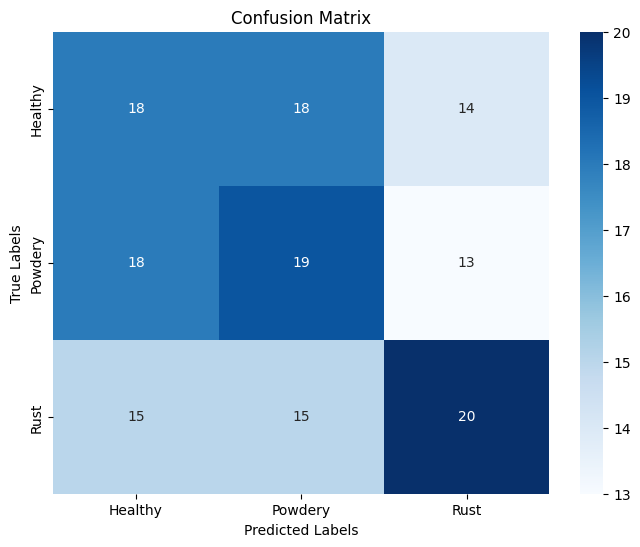

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# ... (previous code remains unchanged)

# Make predictions
predictions = model.predict(test_set)
predicted_classes = np.argmax(predictions, axis=1)

true_classes = test_set.classes
class_names = list(test_set.class_indices.keys())

# Generate confusion matrix
cm = confusion_matrix(true_classes, predicted_classes)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()


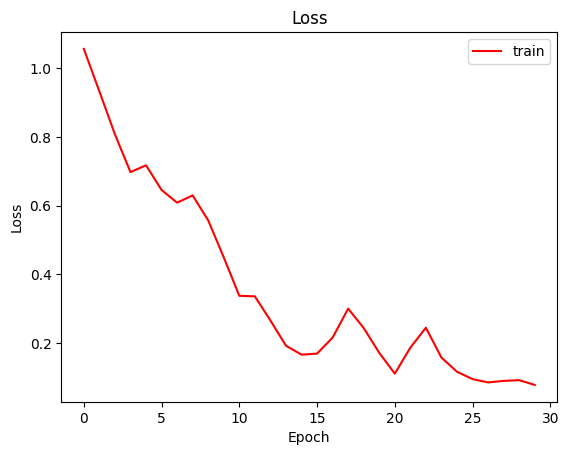

In [ ]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'],c='red')
plt.title('Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['train','validation'],loc='upper right')